In [2]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns 

Concenate parsed files

In [3]:
import pandas as pd
import glob

# Get a list of all TSV files in the directory
filepath="C:/Users/TU/Documents/TuResults/"
file_list=glob.glob(filepath+'/*.tsv')
# Initialize an empty dictionary to store the DataFrames
df_list =[]
# Loop over the file list and read each file into a DataFrame
for file in file_list:
    df = pd.read_csv(file, sep='\t')
    df= df[['Mac','SessionMainMenu','AppName','LogId','Event','ItemId','RealTimePlaying']]
    df_list.append(df)
df_list
concatenated_df = pd.concat(df_list, ignore_index=True)
concatenated_df

C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1010185058.py:11: DtypeWarning: Columns (4,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1010185058.py:11: DtypeWarning: Columns (28,31,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1010185058.py:11: DtypeWarning: Columns (19,25,26,28,29,30,38,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1010185058.py:11: DtypeWarning: Columns (28,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1010185058.py:11: DtypeWarning: Columns (24,25,40,41,42) have mixed types. Specify dtype option on import o

,Mac,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying
0,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,52,StopVOD,100052388,570.300
1,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:01:56:838,IPTV,40,EnterIPTV,NaN,NaN
2,B046FCAC0DC1,B046FCAC0DC1:2016:02:11:01:02:29:258,VOD,55,NextVOD,100052388,NaN
3,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:04:44:59:143,IPTV,18,ChangeModule,NaN,NaN
4,B046FCAC0DC1,B046FCAC0DC1:2016:02:12:12:35:13:437,VOD,54,PlayVOD,100052388,NaN
...,...,...,...,...,...,...,...
914055,B046FCAD1DE8,B046FCAD1DE8:2016:03:11:14:34:33:670,IPTV,42,StopChannel,175,1412.898
914056,B046FCAD1DE8,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57,EnterFolderVOD,1,NaN
914057,B046FCAD1DE8,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57,EnterFolderVOD,1,NaN
914058,B046FCAD1DE8,B046FCAD1DE8:2016:03:11:14:34:07:196,VOD,18,ChangeModule,NaN,NaN


In [4]:
#import user_info tsv
df_userinfo = pd.read_csv(r'C:\Users\TU\Documents\TuResults\User\user_info.tsv', sep='\t')
df_userinfo.columns = df_userinfo.iloc[0]
# Rename columns for sync to other dataset
dfuser_info = df_userinfo.drop(index=0).rename(columns={'MAC':'Mac','# of days':'Days'})
dfuser_info.head()

,Mac,Days
1,FBOXB046FCB79E0B,20
2,FBOXB046FCB3528B,181
3,FBOXB046FCAAFB73,426
4,FBOXB046FCAAFB72,426
5,FBOXB046FCAA2085,429


In [5]:
# Remove "FBOX" charactors in df dataset
dfuser_info['Mac'] = dfuser_info['Mac'].str.replace('FBOX', '')
dfuser_info

,Mac,Days
1,B046FCB79E0B,20
2,B046FCB3528B,181
3,B046FCAAFB73,426
4,B046FCAAFB72,426
5,B046FCAA2085,429
...,...,...
2688,B046FCB1E443,279
2689,001C5500EDDC,810
2690,B046FCB257C8,228
2691,B046FCAB0028,474


In [6]:
# join dfuser_info and concenate_df (parsed log file)
merged_df = pd.merge(dfuser_info, concatenated_df, on='Mac', how='left')
merged_df

,Mac,Days,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying
0,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,57.0,EnterFolderVOD,1,NaN
1,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:16:36:04:314,IPTV,42.0,StopChannel,1,5.4
2,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:18:56:50:485,IPTV,18.0,ChangeModule,NaN,NaN
3,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,2739.0
4,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,33.6
...,...,...,...,...,...,...,...,...
1029759,B046FCB1E443,279,NaN,NaN,NaN,NaN,NaN,NaN
1029760,001C5500EDDC,810,NaN,NaN,NaN,NaN,NaN,NaN
1029761,B046FCB257C8,228,NaN,NaN,NaN,NaN,NaN,NaN
1029762,B046FCAB0028,474,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#check null after merging datasets
merged_df.isnull().sum()

Mac                     0
Days                    0
SessionMainMenu      1001
AppName               973
LogId                 973
Event                 973
ItemId             183151
RealTimePlaying    703793
dtype: int64

In [8]:
# drop rows with null values in multi columns
merged_df = merged_df.dropna(subset=['SessionMainMenu', 'AppName','LogId','Event','ItemId','RealTimePlaying'], how='all', axis=0)
merged_df

,Mac,Days,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying
0,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,57.0,EnterFolderVOD,1,NaN
1,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:16:36:04:314,IPTV,42.0,StopChannel,1,5.400
2,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:18:56:50:485,IPTV,18.0,ChangeModule,NaN,NaN
3,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,2739.000
4,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,33.600
...,...,...,...,...,...,...,...,...
1029752,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:14:34:33:670,IPTV,42.0,StopChannel,175,1412.898
1029753,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57.0,EnterFolderVOD,1,NaN
1029754,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57.0,EnterFolderVOD,1,NaN
1029755,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:14:34:07:196,VOD,18.0,ChangeModule,NaN,NaN


In [9]:
merged_df.isnull().sum()

Mac                     0
Days                    0
SessionMainMenu        28
AppName                 0
LogId                   0
Event                   0
ItemId             182178
RealTimePlaying    702820
dtype: int64

Split StartTimeUsed from SessionMainMenu

In [10]:
# Find ":" position 
# merged_df['Position of :'] = merged_df['SessionMainMenu'].str.find(':')
# merged_df

In [11]:
# split SessionMainMenu to get correct start time of using service
# merged_df_notnullsession = merged_df[merged_df['SessionMainMenu'].notnull()]
# merged_df_notnullsession['StartTimeUsed'] = merged_df_notnullsession.apply(lambda row: row['SessionMainMenu'][row['Position of :']+1:], axis=1)
# merged_df_notnullsession=merged_df_notnullsession.drop(['SessionMainMenu','Position of :'],axis=1)
# merged_df_notnullsession.head()

In [12]:
# create StartDateTime regarding right datetime format
merged_df[['Other','Year', 'Month','Day','Hour','Minute','Second','Millisecond']] = merged_df['SessionMainMenu'].str.split(':', expand=True)
merged_df['StartDateTime'] = pd.to_datetime(merged_df[['Year', 'Month','Day','Hour','Minute','Second','Millisecond']])
merged_df

C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1868204829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['Other','Year', 'Month','Day','Hour','Minute','Second','Millisecond']] = merged_df['SessionMainMenu'].str.split(':', expand=True)
C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1868204829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['Other','Year', 'Month','Day','Hour','Minute','Second','Millisecond']] = merged_df['SessionMainMenu'].str.split(':', expand=True)
C:\Users\TU\

,Mac,Days,SessionMainMenu,AppName,LogId,Event,ItemId,RealTimePlaying,Other,Year,Month,Day,Hour,Minute,Second,Millisecond,StartDateTime
0,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,57.0,EnterFolderVOD,1,NaN,B046FCB79E0B,2016,02,04,10,02,20,345,2016-02-04 10:02:20.345
1,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:16:36:04:314,IPTV,42.0,StopChannel,1,5.400,B046FCB79E0B,2016,02,04,16,36,04,314,2016-02-04 16:36:04.314
2,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:18:56:50:485,IPTV,18.0,ChangeModule,NaN,NaN,B046FCB79E0B,2016,02,04,18,56,50,485,2016-02-04 18:56:50.485
3,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,2739.000,B046FCB79E0B,2016,02,04,10,02,20,345,2016-02-04 10:02:20.345
4,B046FCB79E0B,20,B046FCB79E0B:2016:02:04:10:02:20:345,VOD,52.0,StopVOD,100052494,33.600,B046FCB79E0B,2016,02,04,10,02,20,345,2016-02-04 10:02:20.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029752,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:14:34:33:670,IPTV,42.0,StopChannel,175,1412.898,B046FCAD1DE8,2016,03,11,14,34,33,670,2016-03-11 14:34:33.670
1029753,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57.0,EnterFolderVOD,1,NaN,B046FCAD1DE8,2016,03,11,18,41,56,10,2016-03-11 18:41:56.010
1029754,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:18:41:56:10,VOD,57.0,EnterFolderVOD,1,NaN,B046FCAD1DE8,2016,03,11,18,41,56,10,2016-03-11 18:41:56.010
1029755,B046FCAD1DE8,0,B046FCAD1DE8:2016:03:11:14:34:07:196,VOD,18.0,ChangeModule,NaN,NaN,B046FCAD1DE8,2016,03,11,14,34,07,196,2016-03-11 14:34:07.196


In [13]:
merged_df.isnull().sum()

Mac                     0
Days                    0
SessionMainMenu        28
AppName                 0
LogId                   0
Event                   0
ItemId             182178
RealTimePlaying    702820
Other                  28
Year                   28
Month                  28
Day                    28
Hour                   28
Minute                 28
Second                 28
Millisecond            28
StartDateTime          28
dtype: int64

## Data Wrangling 

In [14]:
# Create new dataframe containing neccessary columns
df = merged_df.loc[:, ~merged_df.columns.isin(['SessionMainMenu','Year', 'Month','Day','Hour','Minute','Second','Millisecond','Other'])]
df

,Mac,Days,AppName,LogId,Event,ItemId,RealTimePlaying,StartDateTime
0,B046FCB79E0B,20,VOD,57.0,EnterFolderVOD,1,NaN,2016-02-04 10:02:20.345
1,B046FCB79E0B,20,IPTV,42.0,StopChannel,1,5.400,2016-02-04 16:36:04.314
2,B046FCB79E0B,20,IPTV,18.0,ChangeModule,NaN,NaN,2016-02-04 18:56:50.485
3,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,2739.000,2016-02-04 10:02:20.345
4,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,33.600,2016-02-04 10:02:20.345
...,...,...,...,...,...,...,...,...
1029752,B046FCAD1DE8,0,IPTV,42.0,StopChannel,175,1412.898,2016-03-11 14:34:33.670
1029753,B046FCAD1DE8,0,VOD,57.0,EnterFolderVOD,1,NaN,2016-03-11 18:41:56.010
1029754,B046FCAD1DE8,0,VOD,57.0,EnterFolderVOD,1,NaN,2016-03-11 18:41:56.010
1029755,B046FCAD1DE8,0,VOD,18.0,ChangeModule,NaN,NaN,2016-03-11 14:34:07.196


In [15]:
# check duplicate in df (parsed log file) and remove them
print("Number of duplicate rows:",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removed:",df.duplicated().sum())
df

Number of duplicate rows: 240690


C:\Users\TU\AppData\Local\Temp\ipykernel_7060\1277636900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Number of duplicate rows after removed: 0


,Mac,Days,AppName,LogId,Event,ItemId,RealTimePlaying,StartDateTime
0,B046FCB79E0B,20,VOD,57.0,EnterFolderVOD,1,NaN,2016-02-04 10:02:20.345
1,B046FCB79E0B,20,IPTV,42.0,StopChannel,1,5.400,2016-02-04 16:36:04.314
2,B046FCB79E0B,20,IPTV,18.0,ChangeModule,NaN,NaN,2016-02-04 18:56:50.485
3,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,2739.000,2016-02-04 10:02:20.345
4,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,33.600,2016-02-04 10:02:20.345
...,...,...,...,...,...,...,...,...
1027749,B046FCAD1DE8,0,IPTV,41.0,StartChannel,55,NaN,2016-03-10 12:04:14.417
1027751,B046FCAD1DE8,0,IPTV,42.0,StopChannel,48,114.505,2016-03-10 15:29:57.994
1027752,B046FCAD1DE8,0,IPTV,42.0,StopChannel,175,1412.898,2016-03-11 14:34:33.670
1027753,B046FCAD1DE8,0,VOD,57.0,EnterFolderVOD,1,NaN,2016-03-11 18:41:56.010


In [16]:
import os
directory = "C:\\Users\\TU\\Documents\\TuResults\\CSVFile"
if not os.path.exists(directory):
    os.mkdir(directory)
df.to_csv(os.path.join(directory, 'my_dataframe.csv'), index=False)
df_from_csv = pd.read_csv(os.path.join(directory, 'my_dataframe.csv'))
print(df_from_csv)

                 Mac  Days AppName  LogId           Event     ItemId  \
0       B046FCB79E0B    20     VOD   57.0  EnterFolderVOD          1   
1       B046FCB79E0B    20    IPTV   42.0     StopChannel          1   
2       B046FCB79E0B    20    IPTV   18.0    ChangeModule        NaN   
3       B046FCB79E0B    20     VOD   52.0         StopVOD  100052494   
4       B046FCB79E0B    20     VOD   52.0         StopVOD  100052494   
...              ...   ...     ...    ...             ...        ...   
788096  B046FCAD1DE8     0    IPTV   41.0    StartChannel         55   
788097  B046FCAD1DE8     0    IPTV   42.0     StopChannel         48   
788098  B046FCAD1DE8     0    IPTV   42.0     StopChannel        175   
788099  B046FCAD1DE8     0     VOD   57.0  EnterFolderVOD          1   
788100  B046FCAD1DE8     0     VOD   18.0    ChangeModule        NaN   

        RealTimePlaying            StartDateTime  
0                   NaN  2016-02-04 10:02:20.345  
1                 5.400  2016-02-

In [17]:
df.isnull().sum()

Mac                     0
Days                    0
AppName                 0
LogId                   0
Event                   0
ItemId             136758
RealTimePlaying    495057
StartDateTime          22
dtype: int64

There are some missing values in the dataset, such as in the "ItemId" and "RealTimePlaying" columns, which may indicate incomplete data or incomplete user actions.

In [18]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788101 entries, 0 to 1027755
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Mac              788101 non-null  object        
 1   Days             788101 non-null  object        
 2   AppName          788101 non-null  object        
 3   LogId            788101 non-null  float64       
 4   Event            788101 non-null  object        
 5   ItemId           651343 non-null  object        
 6   RealTimePlaying  293044 non-null  float64       
 7   StartDateTime    788079 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 54.1+ MB


In [19]:
#convert Days to numerical variable
    #Days that is total days of using all app of each customer
df['Days'] = pd.to_numeric(df['Days'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788101 entries, 0 to 1027755
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Mac              788101 non-null  object        
 1   Days             788101 non-null  int64         
 2   AppName          788101 non-null  object        
 3   LogId            788101 non-null  float64       
 4   Event            788101 non-null  object        
 5   ItemId           651343 non-null  object        
 6   RealTimePlaying  293044 non-null  float64       
 7   StartDateTime    788079 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.1+ MB


C:\Users\TU\AppData\Local\Temp\ipykernel_7060\3148037149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Days'] = pd.to_numeric(df['Days'])


In [20]:
df.head()

,Mac,Days,AppName,LogId,Event,ItemId,RealTimePlaying,StartDateTime
0,B046FCB79E0B,20,VOD,57.0,EnterFolderVOD,1,NaN,2016-02-04 10:02:20.345
1,B046FCB79E0B,20,IPTV,42.0,StopChannel,1,5.4,2016-02-04 16:36:04.314
2,B046FCB79E0B,20,IPTV,18.0,ChangeModule,NaN,NaN,2016-02-04 18:56:50.485
3,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,2739.0,2016-02-04 10:02:20.345
4,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,33.6,2016-02-04 10:02:20.345


### Exploration Data Analysis

This is a data frame containing user activity data. Each row represents a user action that occurred on a specific date and time. The columns provide information about the user, the action they performed, the type of content they interacted with, and the time spent on that content.

There are total 788101 rows and 8 columns

- How is the current data in detail each field?

        - Mac: user ID, the unique identifier for a device or user.
        - Days: the number of days since the start of the dataset.
        - AppName: the name of the application being used (presumably the streaming service).
        - LogId: login id for user, a unique identifier for each event (except LogId 12 for event "Standby" and "Turn on from Standby").
        - Event: movement of user, provides details about the specific action that the user performed (e.g., starting or stopping playback of a video).
        - ItemId: Id of program, a unique identifier for the item (e.g., video) being accessed. Specifies the content item that the user interacted with.
        - RealTimePlaying: represents the time spent on that content item (in seconds).
        - StartDateTime: the timestamp for the start of the event.

- With our expectation is findings in trends or patterns of stopping service, such as which applications and content items are most popular, how much time users spend on each type of content, and how frequently users engage with the platform. 
- As a result, we can propose solution to predict which product user tend to stop log in and implement it. I suggest some following questions for analyzing and answering them:

            Q1. How many numerical variables in the dataset? --> We can lay the foundation of understanding the data we have
            Q2. How many types of apps we served for customer?
            Q3. How is typically the Event of customer?
            Q4. How is typically the spent time of customer once making events?
            Q5. What are the top frequent type event were made? And which apps these events made?
            Q6. Which is the top app that customer stopped to use?
            Q7. How do the duration average of using apps?
            


Q1. How many numerical variables in the dataset?

Q4. How is typically the spent time of customer once making events?

In [21]:
# Statistical Descriptive of numerical variables
df.describe()

,Days,LogId,RealTimePlaying
count,788101.000000,788101.000000,2.930440e+05
mean,237.259314,77.768202,1.244057e+03
std,169.969405,122.054648,6.029524e+04
min,0.000000,12.000000,1.500000e-01
25%,68.000000,41.000000,5.714000e+00
50%,236.000000,42.000000,1.626850e+01
75%,390.000000,48.000000,2.558632e+02
max,976.000000,512.000000,1.743658e+07


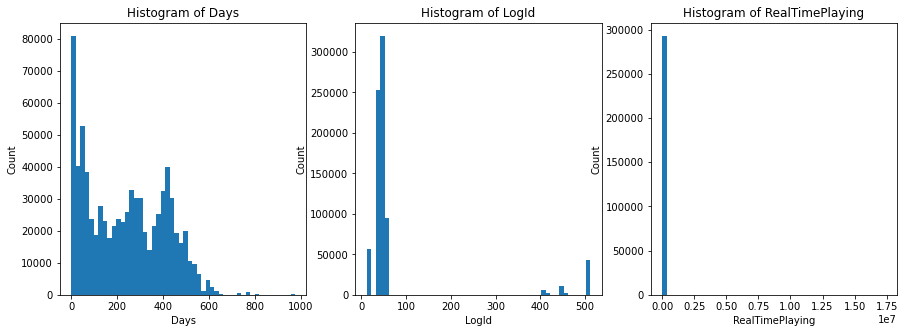

In [22]:
#Make the histogram plot for all numerical variables
# create a figure with three subplots, one for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# create a histogram for Days
axes[0].hist(df['Days'], bins=50)
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Count')
axes[0].set_title('Histogram of Days')

# create a histogram for LogId
axes[1].hist(df['LogId'], bins=50)
axes[1].set_xlabel('LogId')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram of LogId')

# create a histogram for RealTimePlaying
axes[2].hist(df['RealTimePlaying'],bins = 50)
axes[2].set_xlabel('RealTimePlaying')
axes[2].set_ylabel('Count')
axes[2].set_title('Histogram of RealTimePlaying')

plt.show()

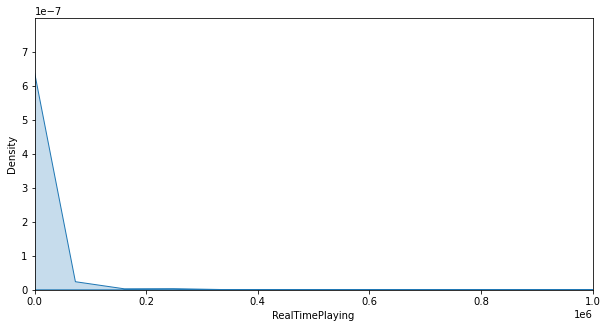

In [23]:
# Density plot for RealTimePlaying
plt.figure(figsize=(10,5))
plt.xlim(0,1000000)
plt.xlabel('RealTimePlaying')
plt.ylabel('Density')
sns.kdeplot(df['RealTimePlaying'],shade=True)
plt.show()

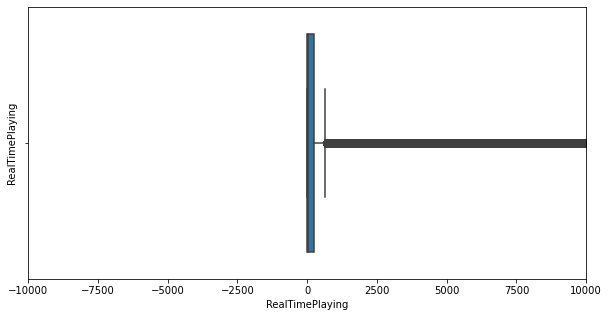

In [24]:
#Box plot for RealTimePlaying
plt.figure(figsize=(10,5))
plt.xlim(-10000,10000)
plt.ylabel('RealTimePlaying')
sns.boxplot(x=df['RealTimePlaying'])
plt.show()

    - Days: This suggests that the data is slightly skewed to the right. The user tends to only use services in a short time. Almost, they used the services from 0 to 100 days
    - LogId: The mean value of LogId is 77.77, and the standard deviation is 122.05 and combining the histgram, this indicates the data is moderately spead out, with a relatively large range of values. The data is slightly skewed to the left. As a result, the user just made a certain number of movement/events.
    - RealTimePlaying: The mean value of RealTimePlaying is 1244.06, and the standard deviation is 60295.24. This indicates that the data is highly spread out, with a very large range of values.This suggests that the data is highly skewed to the right, with a long tail of high values. 
    According to percentile, 25% values < 5.714, 50% values  <16.2685 and 75% values < 255.8632. In the same mean, there are only a few values are significantly higher, a majority of user access the services and spent time on it less.

Q2. How many types of apps we served for customer?

In [25]:
df.head()

,Mac,Days,AppName,LogId,Event,ItemId,RealTimePlaying,StartDateTime
0,B046FCB79E0B,20,VOD,57.0,EnterFolderVOD,1,NaN,2016-02-04 10:02:20.345
1,B046FCB79E0B,20,IPTV,42.0,StopChannel,1,5.4,2016-02-04 16:36:04.314
2,B046FCB79E0B,20,IPTV,18.0,ChangeModule,NaN,NaN,2016-02-04 18:56:50.485
3,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,2739.0,2016-02-04 10:02:20.345
4,B046FCB79E0B,20,VOD,52.0,StopVOD,100052494,33.6,2016-02-04 10:02:20.345


In [26]:
# import os
# directory = "C:\\Users\\TU\\Documents\\TuResults\\CSVFile"
# if not os.path.exists(directory):
#     os.mkdir(directory)
# df.to_csv(os.path.join(directory, 'my_dataframe.csv'), index=False)
# df_from_csv = pd.read_csv(os.path.join(directory, 'my_dataframe.csv'))
# print(df_from_csv)

In [27]:
#Total entries for all kind of app being used.
counts = df.groupby(['AppName']).size()
print(counts)

AppName
IPTV    599772
VOD     188329
dtype: int64


    - There are two types of app being used: IPTV, VOD
    - Base on the counts of AppName, this indicates that users primarily use the IPTV app, as there are more entries for it than the VOD app.

Q3. How is typically the Event of customer?

Q5. What are the top frequent type event were made? And which apps these events made?

In [28]:
#Total times for all types of events made.
counts = df.groupby(['Event']).size().reset_index(name='count').sort_values(['count'], ascending=False) 
print(counts)

                   Event   count
30           StopChannel  237411
27          StartChannel  199887
3              EnterIPTV   53087
32               StopVOD   40939
0           ChangeModule   38749
1         EnterDetailVOD   38482
24       ShowChannelList   33196
2         EnterFolderVOD   33133
29              StartVOD   21652
26               Standby   17760
5               EnterVOD   16241
6        ExitChannelList   11087
17               PlayVOD    7172
14               NextVOD    6392
12   GetDRMKeySuccessful    5855
15              PauseVOD    5841
31         StopTimeshift    3629
28        StartTimeshift    3529
23         Show schedule    2751
4         EnterSearchVOD    2129
21             SearchVOD    1855
9           ExitSchedule    1832
10  FavouriteChannelList    1288
25               ShowEPG     883
7                ExitEPG     799
13        InsertFavorite     738
18           PreviousVOD     589
19        RemoveFavorite     376
22              SetAlarm     324
8         

In [29]:
#Which event is most made?
event_pct_count = df['Event'].value_counts(normalize=True)*100
print("Percentage of Event:")
event_pct_count

Percentage of Event:


StopChannel             30.124438
StartChannel            25.363120
EnterIPTV                6.736066
StopVOD                  5.194639
ChangeModule             4.916756
EnterDetailVOD           4.882877
ShowChannelList          4.212150
EnterFolderVOD           4.204157
StartVOD                 2.747364
Standby                  2.253518
EnterVOD                 2.060776
ExitChannelList          1.406799
PlayVOD                  0.910036
NextVOD                  0.811064
GetDRMKeySuccessful      0.742925
PauseVOD                 0.741149
StopTimeshift            0.460474
StartTimeshift           0.447785
Show schedule            0.349067
EnterSearchVOD           0.270143
SearchVOD                0.235376
ExitSchedule             0.232458
FavouriteChannelList     0.163431
ShowEPG                  0.112041
ExitEPG                  0.101383
InsertFavorite           0.093643
PreviousVOD              0.074737
RemoveFavorite           0.047710
SetAlarm                 0.041111
ExitPIP       

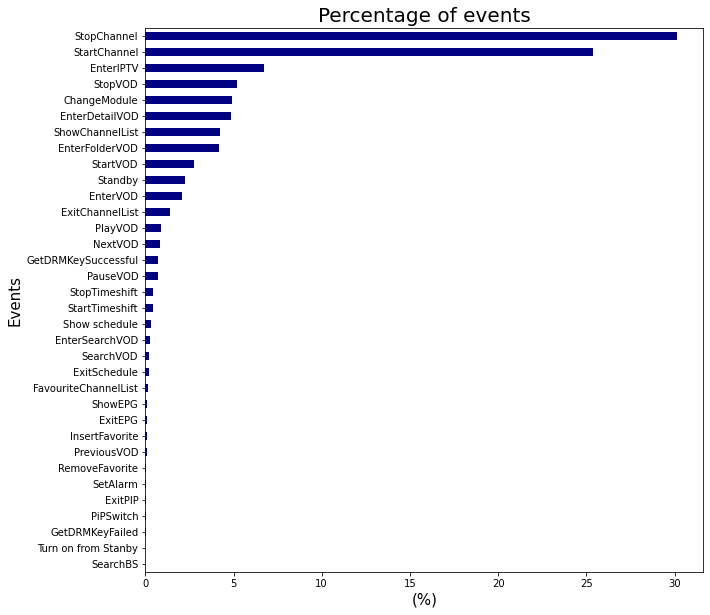

In [30]:
# Plot the barchart of the percentage of events made
fig, axes = plt.subplots(figsize=(10, 10))
event_pct_count.sort_values().plot(kind='barh', color="navy")
axes.set_title("Percentage of events", size=20)
axes.set_ylabel("Events", size=15)
axes.set_xlabel("(%)", size=15);

    The top 11 events are being made and take 90% in total number.
    - StopChannel             30.12%
    - StartChannel            25.36%
    - EnterIPTV                6.73%
    - StopVOD                  5.19%
    - ChangeModule             4.91%
    - EnterDetailVOD           4.88%
    - ShowChannelList          4.21%
    - EnterFolderVOD           4.20%
    - StartVOD                 2.74%
    - Standby                  2.25%
    - EnterVOD                 2.06%
    The top 2 events are StartChanel and StopChanel. Next, we get more insights into which apps these events are made.

And What are the top frequent type app were made?

In [31]:
# Find which apps top 2 events are made
condition1 = df['Event'] == "StopChannel"
condition2 = df['Event'] == "StartChannel"
event_top2 = df.loc[condition1 | condition2]
app_top2event= event_top2.groupby(['AppName','Event'])['Event'].count()
app_top2event

AppName  Event       
IPTV     StartChannel    199887
         StopChannel     237411
Name: Event, dtype: int64

    - There is only one IPTV app have the StartChannel and StopChannel events. That means user frequently start and stop channels in the IPTV app, indicating they may be browssing through channels before settling on one to watch.

According top 10 events, except top 2 above events, the other events are related to a process of using app to watch. Next, we will find which app the user used for these events?

    - EnterIPTV                6.73%
    - StopVOD                  5.19%
    - ChangeModule             4.91%
    - EnterDetailVOD           4.88%
    - ShowChannelList          4.21%
    - EnterFolderVOD           4.20%
    - StartVOD                 2.74%
    - Standby                  2.25%
    - EnterVOD                 2.06%

In [32]:
# Find which apps top 9 events are made
condition1 = df['Event'] == "StopVOD"
condition2 = df['Event'] == "ChangeModule"
condition3 = df['Event'] == "EnterDetailVOD"
condition4 = df['Event'] == "ShowChannelList"
condition5 = df['Event'] == "EnterFolderVOD"
condition6 = df['Event'] == "StartVOD"
condition7 = df['Event'] == "Standby"
condition8 = df['Event'] == "EnterVOD"
event_top8 = df.loc[condition1 | condition2|condition3|condition4|condition5|condition6|condition7|condition8]
app_top8event= event_top8.groupby(['AppName','Event'])['Event'].count()
app_top8event

AppName  Event          
IPTV     ChangeModule       30362
         ShowChannelList    33196
         Standby            13226
VOD      ChangeModule        8387
         EnterDetailVOD     38482
         EnterFolderVOD     33133
         EnterVOD           16241
         Standby             4534
         StartVOD           21652
         StopVOD            40939
Name: Event, dtype: int64

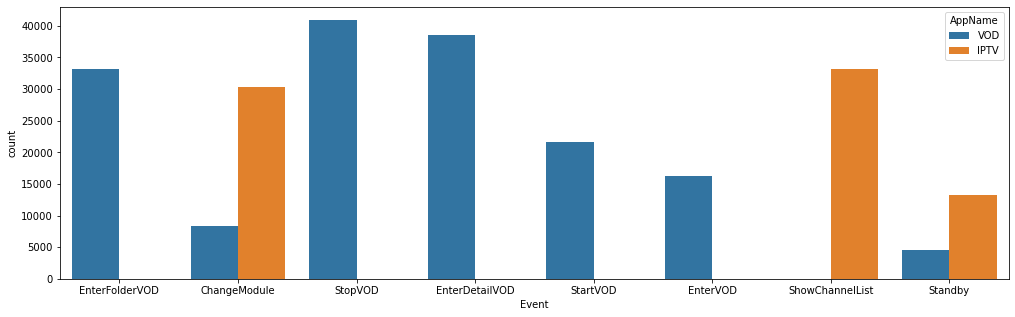

In [33]:
# Bar plot events in app
plt.figure(figsize=(17,5))
sns.countplot(x='Event', hue='AppName', data=event_top8)
plt.show()

    - According the above result, we can have more exact insights into behaviors of user:
        * First, users brows through channels, specialy in IPTV app before settling on one to watch (some events such as ShowChannelList,ChangeModule,Standby)
        * Second, users often enter the VOD app and browse through folders, but may not always watch program to completion, as there are entries of StopVOD, ChangeModule

Q6. Which is the top app that customer stopped to use?

    - Top 1: IPTV
    - Top 2: VOD